In [6]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FloatSlider, interact
from matplotlib.patches import ConnectionPatch
from scipy.stats import norm

miny = -0.5
maxy = 10

# Define ranges for the original and mapped distributions
lins = np.linspace(-maxy, 5, 200)
lins2 = np.linspace(0.001, 5, 200)


# Define the mapped softplus function
def softplus(x, a, b, c):
    return np.log(np.exp((x - a) / b) + 1) * b + c

# Define the inverse mapped softplus function
def inverse_softplus(x, a, b, c):
    return np.log(np.exp((x - c) / b) - 1) * b + a


# Define the derivative of the mapped softplus function
def d_softplus(x, a, b, c):
    xab = (x - a) / b
    return np.exp(xab) / (1 + np.exp(xab))


# Define the probability density function of the mapped distribution, using the change of variables
def p_line2(lins2, mu, sigma, a, b, c):
    invl2 = inverse_softplus(lins2, a, b, c)
    df = d_softplus(invl2, a, b, c)
    p_line2 = norm.pdf(invl2, mu, sigma) / df
    return p_line2

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

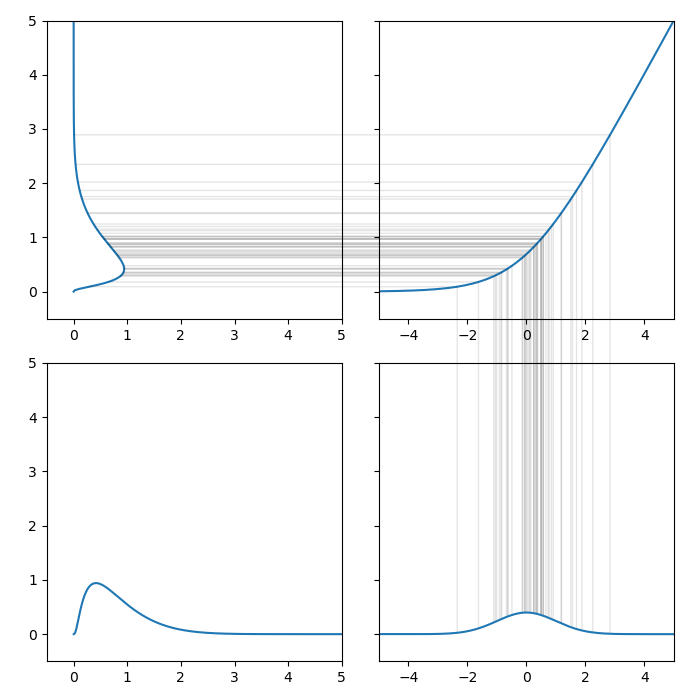

In [7]:
# Enable interactive plotting
%matplotlib ipympl

# Create a figure with 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=False, sharey=True)
plt.tight_layout()
# Set the y-axis limits for the subplots
ax[0, 1].set_ylim(-0.5, 5)
ax[0, 0].set_ylim(-0.5, 5)
ax[1, 1].set_ylim(-0.5, 5)
ax[1, 0].set_xlim(-0.5, 5)
ax[0, 1].set_xlim(-5, 5)
ax[0, 0].set_xlim(-0.5, 5)
ax[1, 1].set_xlim(-5, 5)
ax[1, 0].set_ylim(-0.5, 5)
ax
# Compute and plot the probability density function of the original distribution (Gaussian)
y = norm.pdf(lins)
(line1,) = ax[1, 1].plot(lins, y)

# Compute and plot the softplus transformation
sp = softplus(lins, 0, 1, 0)
(line2,) = ax[0, 1].plot(lins, sp)

# Compute and plot the probability density function of the mapped distribution
pl3 = p_line2(lins2, 0, 1, 0, 1, 0)
(line3,) = ax[0, 0].plot(pl3, lins2)

# Plot the mapped
(line4,) = ax[1, 0].plot(lins2, pl3)

# Sample some random points
x1 = np.random.randn(50)

# Compute the pdf of the points
y1 = norm.pdf(x1, 0, 1)

# Compute the softplus transformation of the points
x2 = x1
y2 = softplus(x2, 0, 1, 0)

# Compute the mapped pdf of the points
x3 = p_line2(y2, 0, 1, 0, 1, 0)
y3 = y2

# Plot the points and the connections
con1s = []
con2s = []
for i in range(len(x1)):
    m = (x1[i], y1[i])
    n = (x2[i], y2[i])
    o = (x3[i], y3[i])
    con1 = ConnectionPatch(
        xyA=m,
        xyB=n,
        coordsA="data",
        axesA=ax[1, 1],
        axesB=ax[0, 1],
        alpha=0.1,
    )
    con1s.append(con1)
    ax[0, 1].add_patch(con1)

    con2 = ConnectionPatch(
        xyA=n,
        xyB=o,
        coordsA="data",
        axesA=ax[0, 1],
        axesB=ax[0, 0],
        alpha=0.1,
    )
    con2s.append(con2)
    ax[0, 0].add_patch(con2)


# Do everythin again in the update function
def f(mu, sigma, a, b, c):
    global con1, con2
    y = norm.pdf(lins, mu, sigma)
    line1.set_ydata(y)
    line2.set_ydata(softplus(lins, a, b, c))
    pl2 = p_line2(lins2, mu, sigma, a, b, c)
    line3.set_xdata(pl2)
    line4.set_ydata(pl2)
    for j, i in enumerate(x1):
        con1s[j].remove()
        con2s[j].remove()
        i_update = i * sigma + mu
        y2 = softplus(i_update, a, b, c)
        m = (i_update, norm.pdf(i_update, mu, sigma))
        n = (i_update, y2)
        o = (p_line2(y2, mu, sigma, a, b, c), y2)

        con1 = ConnectionPatch(
            xyA=m,
            xyB=n,
            coordsA="data",
            coordsB="data",
            axesA=ax[1, 1],
            axesB=ax[0, 1],
            color="black",
            alpha=0.1,
        )
        ax[1, 1].add_patch(con1)

        con2 = ConnectionPatch(
            xyA=n,
            xyB=o,
            coordsA="data",
            coordsB="data",
            axesA=ax[0, 1],
            axesB=ax[0, 0],
            color="black",
            alpha=0.1,
        )
        ax[0, 1].add_patch(con2)
        con1s[j] = con1
        con2s[j] = con2

    fig.canvas.draw_idle()


a = interact(
    f,
    mu=FloatSlider(min=-3, max=3.0, step=0.1, value=0.0),
    sigma=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0),
    a=FloatSlider(min=-2, max=2, step=0.1, value=0.0),
    b=FloatSlider(min=0.01, max=5, step=0.1, value=1.0),
    c=FloatSlider(min=0, max=2, step=0.1, value=0.0),
)
